In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
import numpy as np
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import random
from tqdm import tqdm

[[118 123 137 ...  92 102 116]
 [114 118 121 ...  85 118 112]
 [121 116 117 ...  98  85 101]
 ...
 [ 41  47  41 ...  60  55  42]
 [ 49  42  35 ...  74  61  57]
 [ 40  42  41 ...  64  74  73]]


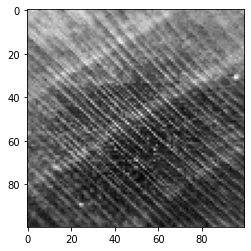

In [ ]:
datadir = "/content/drive/MyDrive/AI nhận diện gỗ"
categories=['Anh_dao','Bach_dang_nk','Bo_de','Cam_lai','Cate','Cho_chi','Dang_huong','Gu_lao','Gu_mat','Hoang_dan','Lim','Muong_den','Soi','Trai_li','Tram_hong']
img_size=100
for category in categories:
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
    new_array = cv.resize(img_array,(img_size,img_size))
    print(new_array)
    plt.imshow(new_array,cmap='gray')
    plt.show()
    break
  break

In [ ]:
training_data=[]
def create_traning_data():

  for category in categories:
    path = os.path.join(datadir,category)
    class_num = categories.index(category)

    for img in tqdm(os.listdir(path)):
      try:
        img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        new_array = cv.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_traning_data()
print(len(training_data))

100%|██████████| 495/495 [00:24<00:00, 20.48it/s]

7268


In [ ]:
#saving (x:picture), (y:label)
x=[]
y=[]
for features, label in training_data :
  x.append(features)
  y.append(label)
x=np.array(x).reshape(-1,img_size,img_size,1)
y=np.array(y)


In [ ]:
#saving x, y as file.pickle into drive
pickle_out=open("/content/drive/MyDrive/AI nhận diện gỗ/Save/x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open("/content/drive/MyDrive/AI nhận diện gỗ/Save/y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

x_train.shape

y_train.shape

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train/=255
x_test/=255

In [ ]:
#BUILD MODEL
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [ ]:
pickle_in = open("/content/drive/MyDrive/AI nhận diện gỗ/Save/x.pickle","rb")
X= pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/AI nhận diện gỗ/Save/y.pickle","rb")
y= pickle.load(pickle_in)

X=X/255.0
y_train = to_categorical(y_train,15)
y_test = to_categorical(y_test,15)

y_train.shape
print('X',X.shape)
print('y',y.shape)

X (7268, 100, 100, 1)
y (7268,)


In [ ]:
y= to_categorical(y,15)

In [ ]:
y.shape

(7268, 15)

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(100,100,1)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(1024,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(1024,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(1024,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(15,activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import SGD
opt=SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X,y,epochs=150,batch_size=64,validation_split=0.2,verbose=1,validation_data=(x_test,y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/150
91/91 [==============================] - 27s 131ms/step - loss: 2.4271 - accuracy: 0.1682 - val_loss: 5.7099 - val_accuracy: 0.0000e+00
Epoch 2/150
91/91 [==============================] - 9s 98ms/step - loss: 1.8140 - accuracy: 0.3259 - val_loss: 8.4015 - val_accuracy: 0.0000e+00
Epoch 3/150
91/91 [==============================] - 9s 99ms/step - loss: 1.4463 - accuracy: 0.4845 - val_loss: 3.9900 - val_accuracy: 0.0000e+00
Epoch 4/150
91/91 [==============================] - 9s 100ms/step - loss: 1.5075 - accuracy: 0.4661 - val_loss: 8.2254 - val_accuracy: 0.0000e+00
Epoch 5/150
91/91 [==============================] - 9s 101ms/step - loss: 1.2445 - accuracy: 0.5666 - val_loss: 6.6602 - val_accuracy: 0.0000e+00
Epoch 6/150
91/91 [==============================] - 10s 108ms/step - loss: 1.0116 - accuracy: 0.6421 - val_loss: 7.6468 - val_accuracy: 0.0461
Epoch 7/150
91/91 [==============================] - 9s 104ms/step - loss: 0.8352 - accuracy: 0.7128 - val_loss: 7.9792 - 

In [ ]:
model.save('wood-detection.h5')

In [ ]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: 'Anh_dao',1:'Bach_dang_nk',2:'Bo_de',3:'Cam_lai',4:'Cate',5:'Cho_chi',6:'Dang_huong',7:'Gu_lao',8:'Gu_mat',9:'Hoang_dan',10:'Lim',11:'Muong_den',12:'Soi',13:'Trai_li',14:'Tram_hong' }
model = load_model('wood-detection.h5')

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
expectation Lim


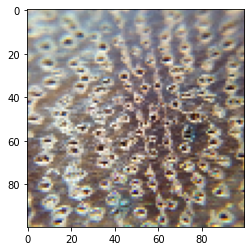

In [ ]:
# load model
img = load_image('/content/drive/MyDrive/AI nhận diện gỗ/User/lim/32104.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation Cho_chi


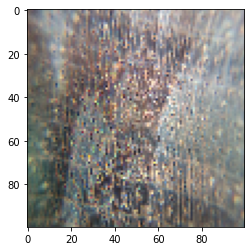

In [ ]:
# load model
img = load_image('/content/drive/MyDrive/AI nhận diện gỗ/User/Gumat/23110.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
expectation Muong_den


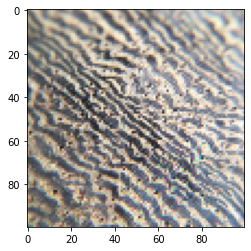

In [ ]:
# load model
img = load_image('/content/drive/MyDrive/AI nhận diện gỗ/User/muongden/40276.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
expectation Muong_den


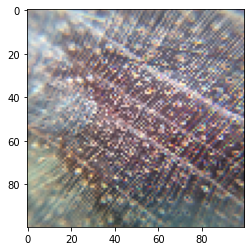

In [ ]:
# load model
img = load_image('/content/drive/MyDrive/AI nhận diện gỗ/User/Gumat/23114.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation Cho_chi


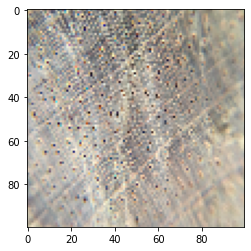

In [ ]:
# load model
img = load_image('/content/drive/MyDrive/AI nhận diện gỗ/User/Gulao/21327.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])